In [2]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.io.arff

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# carregando o dataset
data, meta = scipy.io.arff.loadarff(f'data/speeddating.arff')
df = pd.DataFrame(data)

# Convertendo byte-strings para strings
str_df = df.select_dtypes([object]).stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

# ajeitar o tipo dos dados
nominal_cols = [col for col, dtype in zip(meta.names(), meta.types()) if dtype == 'nominal']
for col in nominal_cols:
    df[col] = df[col].astype('category')

df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,0,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


## Descrição Geral

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype   
---   ------                           -----   
 0    has_null                         category
 1    wave                             float64 
 2    gender                           category
 3    age                              float64 
 4    age_o                            float64 
 5    d_age                            float64 
 6    d_d_age                          category
 7    race                             category
 8    race_o                           category
 9    samerace                         category
 10   importance_same_race             float64 
 11   importance_same_religion         float64 
 12   d_importance_same_race           category
 13   d_importance_same_religion       category
 14   field                            category
 15   pref_o_attractive                float64 
 16   pref_o_sincere        

In [5]:
missing_values = 0
col_missing_values = 0
for col in df.columns:
    valores_ausentes = df[col].isna().sum()
    if valores_ausentes > 0:
        col_missing_values += 1
        print(f"{col} tem {valores_ausentes} valores ausentes")
    missing_values += valores_ausentes

age tem 95 valores ausentes
age_o tem 104 valores ausentes
importance_same_race tem 79 valores ausentes
importance_same_religion tem 79 valores ausentes
pref_o_attractive tem 89 valores ausentes
pref_o_sincere tem 89 valores ausentes
pref_o_intelligence tem 89 valores ausentes
pref_o_funny tem 98 valores ausentes
pref_o_ambitious tem 107 valores ausentes
pref_o_shared_interests tem 129 valores ausentes
attractive_o tem 212 valores ausentes
sinsere_o tem 287 valores ausentes
intelligence_o tem 306 valores ausentes
funny_o tem 360 valores ausentes
ambitous_o tem 722 valores ausentes
shared_interests_o tem 1076 valores ausentes
attractive_important tem 79 valores ausentes
sincere_important tem 79 valores ausentes
intellicence_important tem 79 valores ausentes
funny_important tem 89 valores ausentes
ambtition_important tem 99 valores ausentes
shared_interests_important tem 121 valores ausentes
attractive tem 105 valores ausentes
sincere tem 105 valores ausentes
intelligence tem 105 valores

In [6]:
print(f"{missing_values} valores ausentes")
print(f"{col_missing_values} colunas com valores ausentes")

18173 valores ausentes
57 colunas com valores ausentes


O dataset conta com 8378 registros e 123 features, sendo 64 features categóricas e 59 numéricas (float) e um total de 18173 valores ausentes, distribuidos em 57 colunas. Algumas colunas apresentam poucos valores ausentes, como 79 (de um total de 8378), enquanto outras possuem uma quantidade significante faltando, como expected_num_interested_in_me com 6578 (78%) valores.

Logo de início, podemos identificar algumas colunas possivelmente redundantes, como "age", "age_o", "d_age", "d_d_age", que representam idade, idade do parceiro, diferença de idade (valor), diferença de idade (categoria). Possivelmente pode-se reduzir essas colunas, já que representam informações muito similares.

### Análise Univariada

In [7]:
df.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000


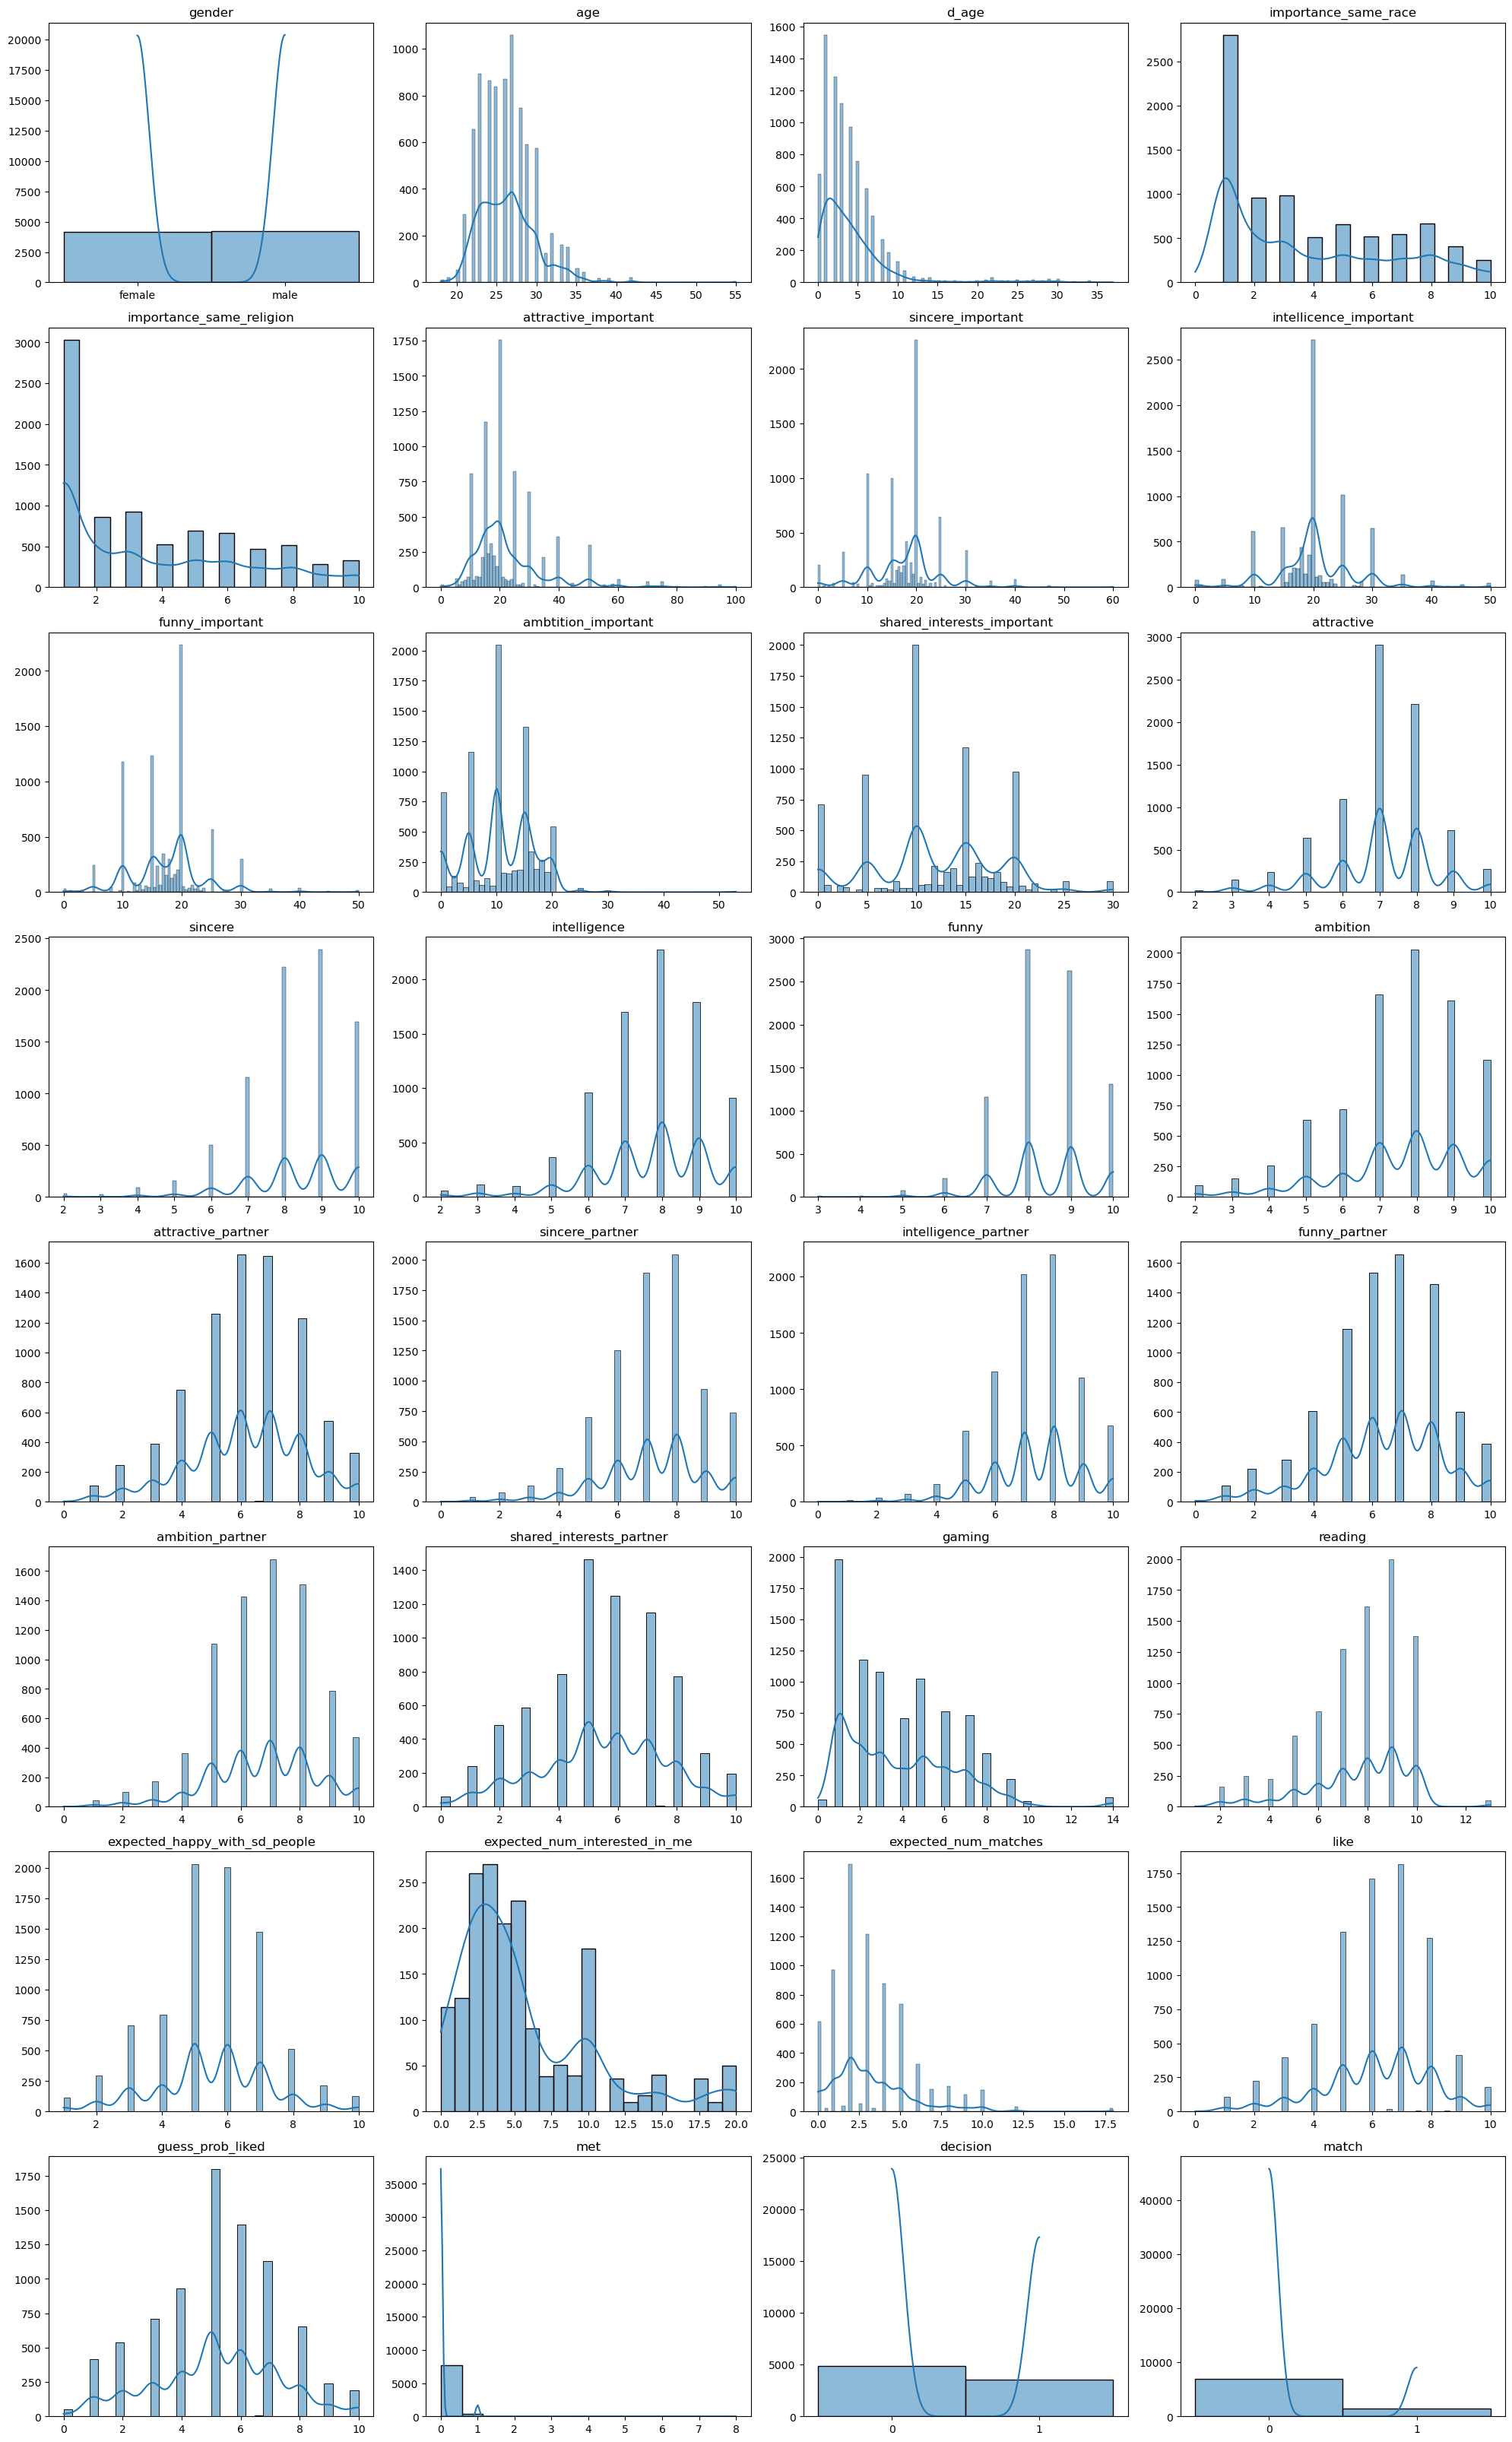

In [8]:
cols = [
    'gender', 'age', 'd_age', 'importance_same_race', 'importance_same_religion', 'attractive_important',
    'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important',
    'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 
    'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'gaming',
    'reading', 'expected_happy_with_sd_people', 'expected_num_interested_in_me',
    'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'decision', 'match'
]

num_cols = len(cols)
num_rows = (num_cols // 4) + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df[cols].columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

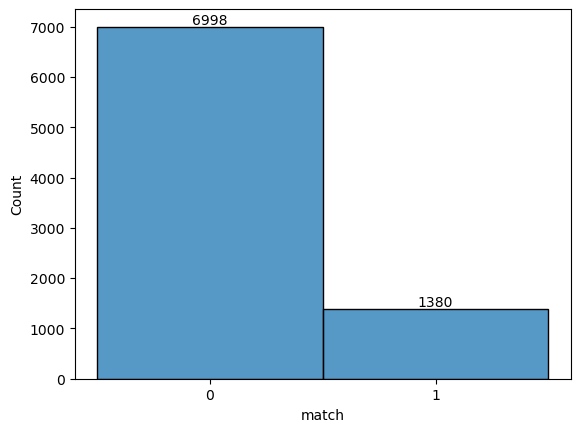

In [35]:
ax = sns.histplot(df['match'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Podemos fazer algumas observações a partir desses gráficos:
- Temos a mesma quantidade de homens e mulheres.
- Tem um grande desbalanceamento das classes (6998 da classe negativa contra cerca de 1380 da classe positiva).
- A maioria das pessoas tem entre 20 e 30 anos, mas existe pessoas com mais de 40 anos.
- A maioria das diferenças entre idade é de 0 a 10 anos, mas existe diferença com mais de 20 anos, e até mesmo uma com 37 anos.
- A maioria das pessoas não se importa muito quanto à raça e à religião do parceiro.
- Gaming tem valores com 14 e Reading com 12, o que é uma inconsistência, já que os valores deveriam ir de 1 a 10.
- Parece haver outliers em expected_num_matches

De maneira geral, as pessoas não atribuem muita importância aos atributos listados (geralmente fica em torno de 20, até cerca de 30), com alguns sendo excepcionalmente baixos, como ambição, cuja moda é 10. Vemos que as pessoas se consideram atrativas num nivel entre 7 e 8 de 10, se consideram muito sinceras, inteligentes, engraçadas e ambiciosas. Seria interessante comparar o que as pessoas acham de si mesmo com o que as outras pessoas acham. Aparentemente parece estar meio equilibrado, olhando separadamente os gráficos. As pessoas não parecem ter grandes expectativas para o SD, ficando em torno de 4-5 a expectativa de ser feliz com o SD, enquanto que o "like" ficou em torno de 7-6.

Podemos observar também que existe uma diferença nas escalas dos atributos, enquanto alguns estão na escala de 1 a 10, outros estão na escala de 1 a 100. Pode ser interessante utilizar alguma técnica de scaling, como MinMax, para fazer com que todos as variáveis fiquem na mesma escala, o que ajudaria algoritmos como KNN, onde diferentes escalas podem dominar umas as outras.

Vamos analisar melhor as distribuições das variáveis numéricas:

In [9]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.columns

Index(['wave', 'age', 'age_o', 'd_age', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive', 'sincere', 'intelligence', 'funny', 'ambition',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
 

In [10]:
# removendo colunas que não são interessante para analisarmos
numeric_columns.drop(columns=['wave', 'age_o', 'd_age', 'interests_correlate'], inplace=True)

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_26320\1811154322.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Column", y="Value", data=df_melted, palette='coolwarm', flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 6})


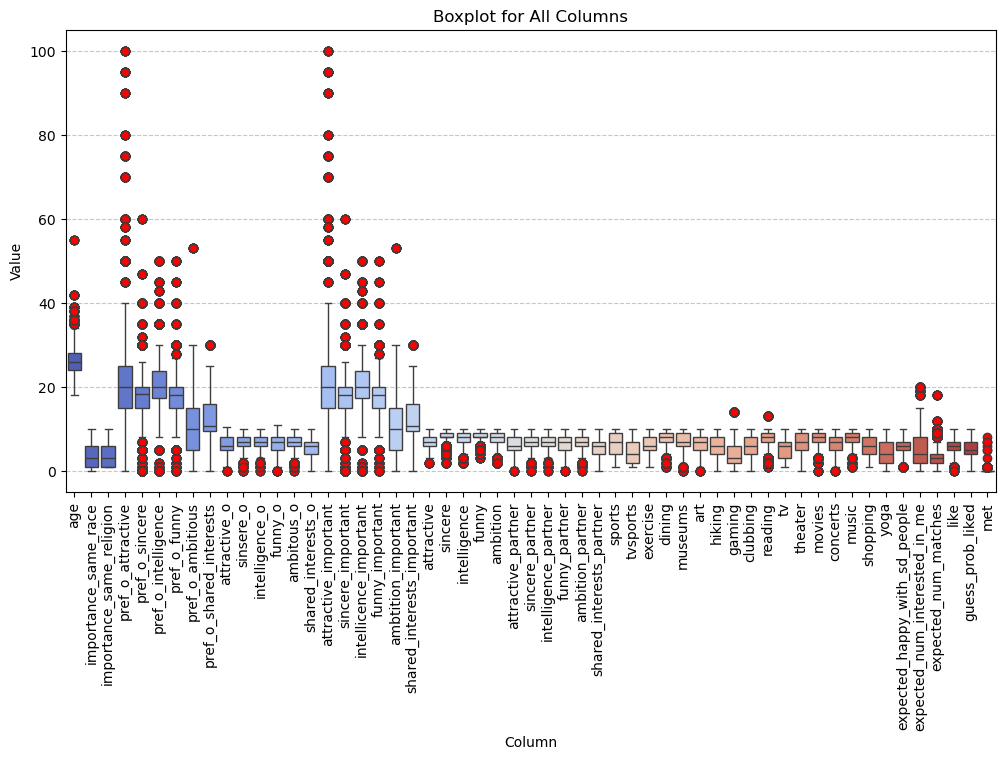

In [11]:
df_melted = numeric_columns.melt(var_name="Column", value_name="Value")

# Create the boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(x="Column", y="Value", data=df_melted, palette='coolwarm', flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 6})
# sns.boxplot(x="Column", y="Value", data=df_melted, palette='coolwarm')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Boxplot for All Columns")
plt.show()

In [12]:
len(numeric_columns.columns)

55

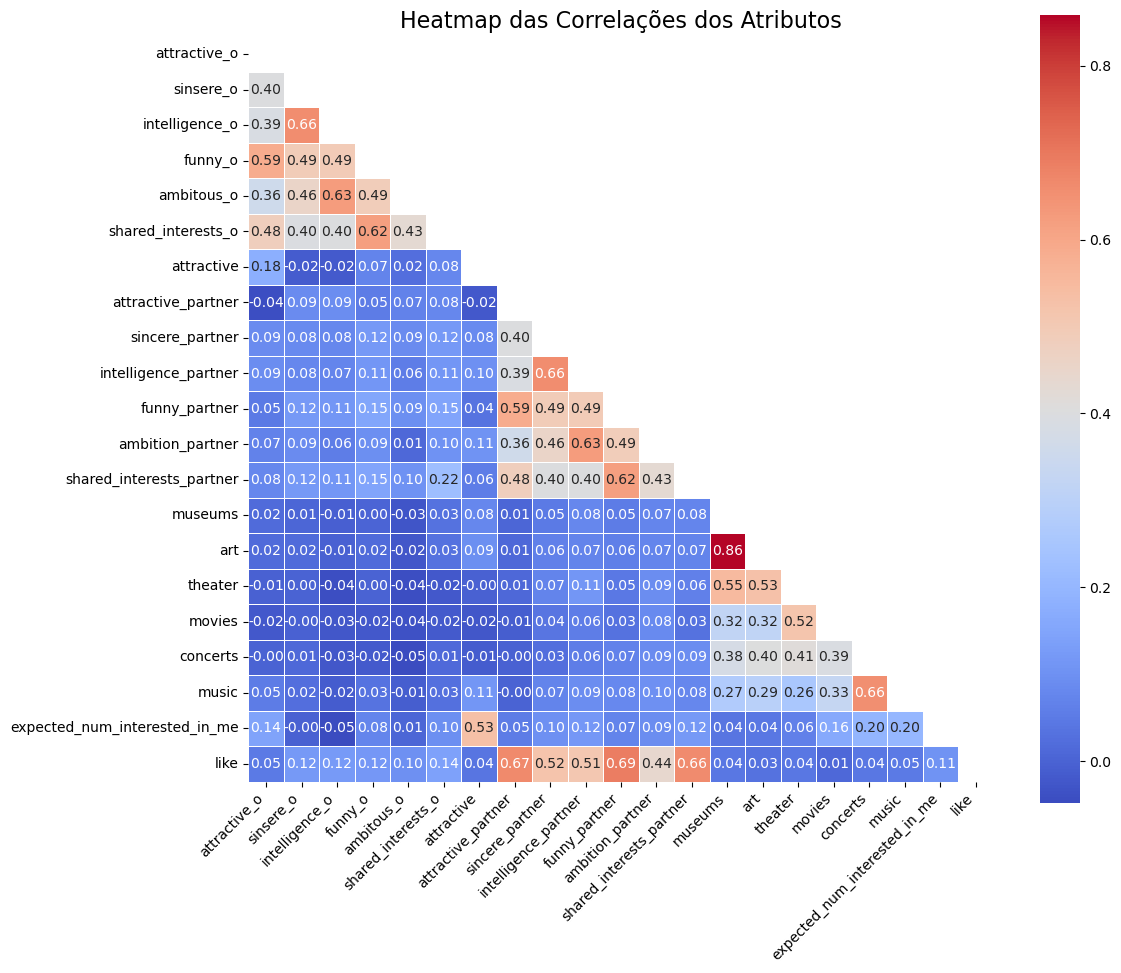

In [16]:
threshold = 0.5

corr_matrix = numeric_columns.corr()

masked_corr = corr_matrix.copy()
np.fill_diagonal(masked_corr.values, np.nan)

significant_columns = masked_corr.columns[
    (masked_corr.abs() > threshold).any(axis=0)
]

filtered_corr_matrix = corr_matrix.loc[significant_columns, significant_columns]

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))
sns.heatmap(
    filtered_corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    annot_kws={'size':10}
)

plt.title("Heatmap das Correlações dos Atributos", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()